In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

/home/kabir/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
num_classes = 10

In [3]:
img_rows, img_cols = 28, 28

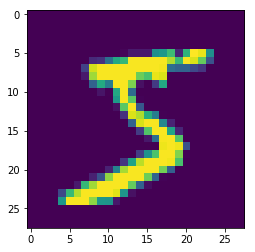

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0])
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
print(type(x_train))

<class 'numpy.ndarray'>


In [6]:
x_train[0].shape

(28, 28, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential()
model.add(Conv2D(1, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(1, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 1)         10        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 1)         10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [11]:
def nice_img_printer(model, img):
    '''returns the img as a 2d array'''
    exp_img = np.expand_dims(img,axis=0)
    conv_img = model.predict(exp_img)

    conv_img = np.squeeze(conv_img, axis=0)
    conv_img = np.reshape(conv_img, (-1, 12))
    return conv_img

(12, 12)


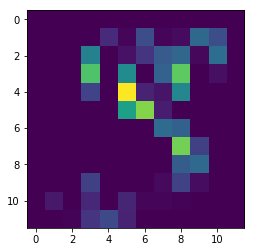

In [12]:
img = x_train[0]
img = nice_img_printer(model, img)

print(img.shape)
plt.imshow(img) 

In [37]:
import time
initial_time = time.time()
for i in range(x_train.shape[0]):
    img = x_train[i]
    img = nice_img_printer(model, img)
reduction_time = time.time() - initial_time
print(reduction_time)

77.92311549186707


In [22]:
# reduction_time_mins, reduction_time_seconds = int(reduction_time // 60), reduction_time % 60
# print("mins:seconds", reduction_time_mins,":",reduction_time_seconds)

mins:seconds 1 : 14.813807487487793


In [13]:
quarter_initial_time = time.time()
for i in range(x_train.shape[0] // 4):
    img = x_train[i]
    img = nice_img_printer(model, img)
quarter_reduction_time = time.time() - quarter_initial_time
print(quarter_reduction_time)

19.331972122192383


In [14]:
# quarter_reduction_time_mins, quarter_reduction_time_seconds = int(quarter_reduction_time // 60), quarter_reduction_time % 60
# print("mins:seconds", quarter_reduction_time_mins,":",quarter_reduction_time_seconds)

mins:seconds 0 : 19.331972122192383


In [ ]:
# divide_factor = 2
# while divide_factor <= 128:
#     first_component_reduction_time_initial = time.time()
#     for i in range(x_train.shape[0] // divide_factor):
#         img = x_train[i]
#         img = nice_img_printer(model, img)
#     first_component_reduction_time = time.time() - first_component_reduction_time_initial
#     print(first_component_reduction_time)


In [15]:
by6_initial_time = time.time()
for i in range(x_train.shape[0] // 6):
    img = x_train[i]
    img = nice_img_printer(model, img)
by6_reduction_time = time.time() - by6_initial_time
print(by6_reduction_time)

11.301003217697144


In [16]:
by8_initial_time = time.time()
for i in range(x_train.shape[0] // 8):
    img = x_train[i]
    img = nice_img_printer(model, img)
by8_reduction_time = time.time() - by8_initial_time
print(by8_reduction_time)

8.796293258666992


In [17]:
by10_initial_time = time.time()
for i in range(x_train.shape[0] // 10):
    img = x_train[i]
    img = nice_img_printer(model, img)
by10_reduction_time = time.time() - by10_initial_time
print(by10_reduction_time)

7.003547191619873


In [18]:
by16_initial_time = time.time()
for i in range(x_train.shape[0] // 16):
    img = x_train[i]
    img = nice_img_printer(model, img)
by16_reduction_time = time.time() - by16_initial_time
print(by16_reduction_time)

4.384636163711548


In [19]:
by32_initial_time = time.time()
for i in range(x_train.shape[0] // 32):
    img = x_train[i]
    img = nice_img_printer(model, img)
by32_reduction_time = time.time() - by32_initial_time
print(by32_reduction_time)

2.166170358657837


In [20]:
by33_initial_time = time.time()
for i in range(x_train.shape[0] // 33):
    img = x_train[i]
    img = nice_img_printer(model, img)
by33_reduction_time = time.time() - by33_initial_time
print(by33_reduction_time)

2.5417637825012207


In [25]:
by40_initial_time = time.time()
for i in range(x_train.shape[0] // 40):
    img = x_train[i]
    img = nice_img_printer(model, img)
by40_reduction_time = time.time() - by40_initial_time
print(by40_reduction_time)

1.73313307762146


In [36]:
by41_initial_time = time.time()
for i in range(x_train.shape[0] // 41):
    img = x_train[i]
    img = nice_img_printer(model, img)
by41_reduction_time = time.time() - by41_initial_time
print(by41_reduction_time)

1.709388017654419


In [23]:
by50_initial_time = time.time()
for i in range(x_train.shape[0] // 50):
    img = x_train[i]
    img = nice_img_printer(model, img)
by50_reduction_time = time.time() - by50_initial_time
print(by50_reduction_time)

1.4672191143035889


In [24]:
by51_initial_time = time.time()
for i in range(x_train.shape[0] // 51):
    img = x_train[i]
    img = nice_img_printer(model, img)
by51_reduction_time = time.time() - by51_initial_time
print(by51_reduction_time)

1.3576161861419678


In [38]:
half_initial_time = time.time()
for i in range(x_train.shape[0] // 2):
    img = x_train[i]
    img = nice_img_printer(model, img)
half_reduction_time = time.time() - half_initial_time
print(half_reduction_time)

38.13211941719055
